# Diffusion equation
The [diffusion equation](https://en.wikipedia.org/wiki/Diffusion_equation) reads
$$\frac{\partial c}{\partial t} + \nabla. (-D \nabla c) = 0$$
This equation describe many transport processes, e.g., heat transfer by conduction and mass transfer by diffusion.

## Steady-state diffusion equation
Here we solve a diffusion equation on a rectangular domain with fixed value on each boundary:
$$\nabla. (-D \nabla c) = 0$$
Boundary conditions:
$$c(x=0,\; y)=1.0$$
$$c(x=L_x,\; y)=3.0$$
$$c(x,\; y=0)=2.0$$
$$c(x,\; y=L_y)=4.0$$

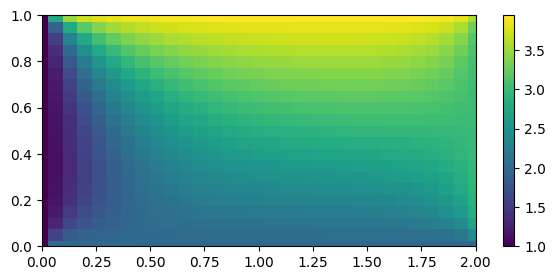

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd5314f8110>

In [7]:
using JFVM

# domain
Lx = 2.0
Ly = 1.0
Nx = 30
Ny = 20
c_left   = 1.0
c_right  = 3.0
c_bottom = 2.0
c_top    = 4.0
m  = createMesh2D(Nx, Ny, Lx, Ly)

# diffusion coefficient
D_val  = 1e-5 # [m^2/s]
D_cell = createCellVariable(m, D_val)
D_face = harmonicMean(D_cell)
M_diff = diffusionTerm(D_face)

# Boundary conditions
BC             = createBC(m)
BC.left.a[:]   = 0.0
BC.left.b[:]   = 1.0
BC.left.c[:]   = c_left
BC.right.a[:]  = 0.0
BC.right.b[:]  = 1.0
BC.right.c[:]  = c_right
BC.bottom.a[:] = 0.0
BC.bottom.b[:] = 1.0
BC.bottom.c[:] = c_bottom
BC.top.a[:]    = 0.0
BC.top.b[:]    = 1.0
BC.top.c[:]    = c_top
M_bc, RHS_bc   = boundaryConditionTerm(BC)

# solve the equation
c = solveLinearPDE(m, M_diff+M_bc, RHS_bc)
figure(figsize=(7,3))
visualizeCells(c)
colorbar()

## Above equation with a source term
Let's add a source term right in the middle of the domain (q=1.0 mol/s)
$$\nabla. (-D \nabla c) = q$$
Boundary conditions:
$$c(x=0,\; y)=1.0$$
$$c(x=L_x,\; y)=1.0$$
$$c(x,\; y=0)=1.0$$
$$c(x,\; y=L_y)=1.0$$
$$q(x=L_x/2,\; y=L_y/2)=1.0$$

In [20]:
using JFVM

# domain
Lx = 2.0
Ly = 1.0
Nx = 30
Ny = 20
c_left   = 1.0    # [mol/m^3]
c_right  = 3.0    # [mol/m^3]
c_bottom = 2.0    # [mol/m^3]
c_top    = 4.0    # [mol/m^3]
q        = 1.0e-4 # [mol/s]
m  = createMesh2D(Nx, Ny, Lx, Ly)

# diffusion coefficient
D_val  = 1e-5                          # [m^2/s]
D_cell = createCellVariable(m, D_val)
D_face = harmonicMean(D_cell)
M_diff = diffusionTerm(D_face)

# Boundary conditions
BC             = createBC(m)
BC.left.a[:]   = 0.0
BC.left.b[:]   = 1.0
BC.left.c[:]   = c_left
BC.right.a[:]  = 0.0
BC.right.b[:]  = 1.0
BC.right.c[:]  = c_right
BC.bottom.a[:] = 0.0
BC.bottom.b[:] = 1.0
BC.bottom.c[:] = c_bottom
BC.top.a[:]    = 0.0
BC.top.b[:]    = 1.0
BC.top.c[:]    = c_top
M_bc, RHS_bc   = boundaryConditionTerm(BC)

# source term
q_cell = createCellVariable(m, q)
v_cell = cellVolume(m)
q_cell.value[Int(Nx/2)+1, Int(Ny/2)+1] = q       # [mol/s]
RHS_source  = constantSourceTerm(q_cell./v_cell) # [mol/m^3/s]

# solve the equation
c = solveLinearPDE(m, -M_diff+M_bc, RHS_bc+RHS_source)
figure(figsize=(7,3))
visualizeCells(c)
colorbar()

LoadError: [91mMethodError: no method matching /(::JFVM.CellValue{Float64}, ::JFVM.CellValue{Float64})[0m
Closest candidates are:
  /([91m::PyCall.PyObject[39m, ::Any) at /home/ali/.julia/v0.6/PyCall/src/PyCall.jl:791
  /([91m::Real[39m, ::JFVM.CellValue) at /home/ali/.julia/v0.6/JFVM/src/domainOperators.jl:149
  /(::JFVM.CellValue, [91m::Real[39m) at /home/ali/.julia/v0.6/JFVM/src/domainOperators.jl:154[39m

In [25]:
q_cell./v_cell

LoadError: [91mMethodError: no method matching /(::JFVM.CellValue{Float64}, ::JFVM.CellValue{Float64})[0m
Closest candidates are:
  /([91m::PyCall.PyObject[39m, ::Any) at /home/ali/.julia/v0.6/PyCall/src/PyCall.jl:791
  /([91m::Real[39m, ::JFVM.CellValue) at /home/ali/.julia/v0.6/JFVM/src/domainOperators.jl:149
  /(::JFVM.CellValue, [91m::Real[39m) at /home/ali/.julia/v0.6/JFVM/src/domainOperators.jl:154[39m